<a href="https://colab.research.google.com/github/LandsZero/commesage/blob/main/l2QV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

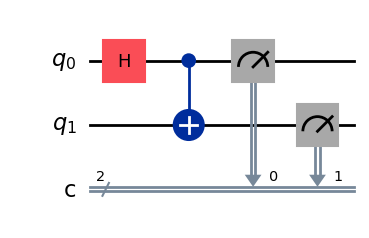

In [7]:
from qiskit import QuantumCircuit
# Создаем квантовую схему с 2 кубитами и 2 классическими битами
circuit = QuantumCircuit(2, 2)
# Добавляем квантовые вентили
circuit.h(0) # Применяем вентиль Адамара к кубиту 0
circuit.cx(0, 1) # Применяем CNOT вентиль между кубитами 0 и 1
circuit.measure([0, 1], [0, 1]) # Измеряем состояния кубитов и
circuit.draw(output='mpl')

ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)


Исходная схема:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 

Транспилированная схема:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 

Результаты измерений:
{'00': 259, '11': 241}


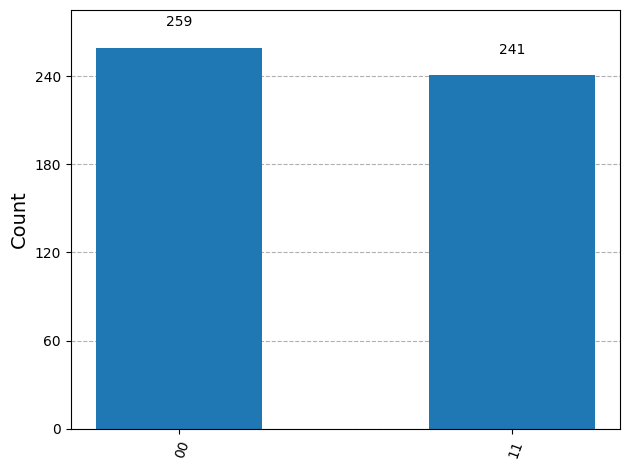

In [13]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Создаем квантовую схему с 2 кубитами и 2 классическими битами
circ = QuantumCircuit(2, 2)
circ.h(0)     # Применяем гейт Адамара к первому кубиту
circ.cx(0, 1) # Применяем гейт CNOT ко второму кубиту, управляемый первым
circ.measure([0, 1], [0, 1]) # Измеряем оба кубита

# Выбираем симулятор в качестве бэкенда
simulator = AerSimulator()

# Выполняем транспиляцию схемы для симулятора
# Транспиляция оптимизирует схему, чтобы она могла быть выполнена на бэкенде
transpiled_circuit = transpile(circ, simulator)

# Визуализируем исходную схему и транспилированную
print("Исходная схема:")
print(circ.draw())
print("\nТранспилированная схема:")
print(transpiled_circuit.draw())

# Запускаем транспилированную схему на симуляторе
job = simulator.run(transpiled_circuit, shots=500)
result = job.result()
counts = result.get_counts(transpiled_circuit)

# Выводим результаты
print("\nРезультаты измерений:")
print(counts)
plot_histogram(counts)


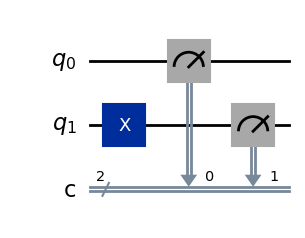

In [16]:
#scheme1_1
from qiskit import QuantumCircuit
# Создаем квантовую схему с 2 кубитами и 2 классическими битами
s1 = QuantumCircuit(2, 2)
# Добавляем квантовые вентили
s1.x(1) # Применяем CNOT вентиль между кубитами 0 и 1
s1.measure([0, 1], [0, 1]) # Измеряем состояния кубитов и
s1.draw(output='mpl')


Результаты измерений (количество): {'1': 1}

Результаты измерений2 (количество): {'1': 2}

Результаты измерений3 (количество): {'1': 4, '0': 4}

Результаты измерений4 (количество): {'0': 515, '1': 509}


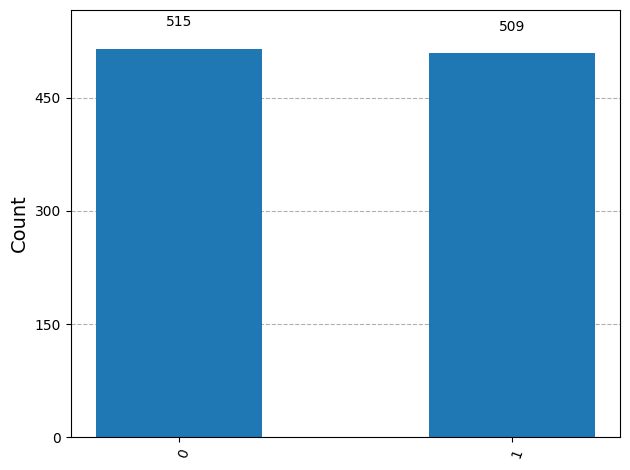

In [41]:
#scheme1_2
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
# Создаем квантовую схему с 1 кубитами и 1 классическими битами
s2 = QuantumCircuit(1,1)
s2.h(0)
initial_state = [1/np.sqrt(2), 1/np.sqrt(2)]
s2.initialize(initial_state, 0)
s2.measure([0, 0], [0, 0]) # Измеряем состояния кубитов
s2.draw(output='mpl')
simulator = AerSimulator()
job = simulator.run(s2, shots=1)
job2 = simulator.run(s2, shots=2)
job3 = simulator.run(s2, shots=8)
job4 = simulator.run(s2, shots=1024)

result = job.result()
result2 = job2.result()
result3 = job3.result()
result4 = job4.result()


counts = result.get_counts()
counts2 = result2.get_counts()
counts3 = result3.get_counts()
counts4 = result4.get_counts()


print("\nРезультаты измерений (количество):", counts)
print("\nРезультаты измерений2 (количество):", counts2)
print("\nРезультаты измерений3 (количество):", counts3)
print("\nРезультаты измерений4 (количество):", counts4)


plot_histogram(counts4)
##Результат примерно 50%
##

In [52]:
#scheme1_3
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
# Создаем квантовую схему с 2 кубитами и 2 классическими битами
s3 = QuantumCircuit(2, 2)
# Добавляем квантовые вентили
s3.h(0) # Применяем вентиль Адамара к кубиту 0
s3.x(1) # Применяем вентиль Адамара к кубиту 0
s3.cx(0, 1) # Применяем CNOT вентиль между кубитами 0 и 1
s3.measure([0, 1], [0, 1]) # Измеряем состояния кубитов и
s3.draw(output='mpl')
simulator = AerSimulator()
jobs3 = simulator.run(s3, shots=1000)
results3 = jobs3.result()
countss3 = results3.get_counts

print("\nРезультаты измерений4 (количество):", countss3)






Результаты измерений4 (количество): <bound method Result.get_counts of Result(backend_name='aer_simulator', backend_version='0.17.2', job_id='ba57ea15-1101-4716-902c-373388a56aff', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 514, '0x2': 486}), header={'creg_sizes': [['c', 2]], 'global_phase': 0.0, 'memory_slots': 2, 'n_qubits': 2, 'name': 'circuit-96', 'qreg_sizes': [['q', 2]], 'metadata': {}}, status=DONE, seed_simulator=2046189233, metadata={'time_taken': 0.004370372, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.003083672, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12975, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion'